<a href="https://colab.research.google.com/github/kai-fib/Shack-Labs-Data-Science/blob/main/Shack_Labs_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Predict the price of a house



# Problem Statement:

The goal is to understand the relationship between house features and how these variables affect the house price.

#### Dataset Link : https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvoXtK9sYAAma6FW0ladl=0&preview=Data+Science+Assignment.pdf

##### .

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read The Dataset
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
#shape of the dataset Rows:414 Columns:9
df.shape

(414, 9)

In [ ]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

##### No Null values so we could proceed with further analysis

In [ ]:
#Removing the uncessary data point 
df.drop(["longitude","latitude","Transaction date"], inplace=True, axis=1)

In [ ]:
#Description of the data
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,3.000000,1500.000000,117.500000


In [ ]:
#Correlation between the rest columns
df.corr()["House price of unit area"]

House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

In [ ]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1


### Univariate and Multivariate Analysis of the given data 

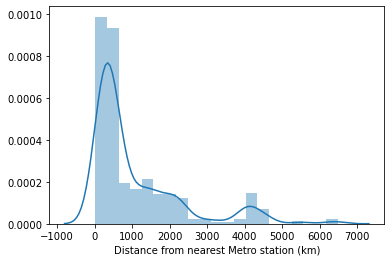

In [ ]:
# Distribution plot of Distance from nearest Metro station (km)
sns.distplot(df['Distance from nearest Metro station (km)'])

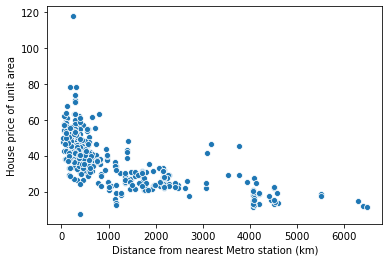

In [ ]:
# Scatterplot 
sns.scatterplot(df['Distance from nearest Metro station (km)'],df['House price of unit area'])

#### assumption - The datapoint which is at the left top corner & right bottom corner look like outliers

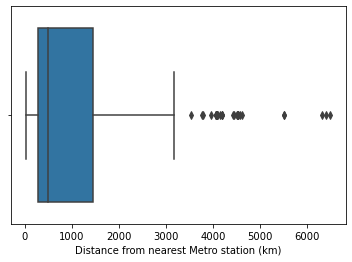

In [ ]:
#Boxplot for Distance nearest Metro Station (km)
sns.boxplot(df['Distance from nearest Metro station (km)'])

In [ ]:
# Detecting Outliers
Q1 = np.percentile(df["Distance from nearest Metro station (km)"], 25,
                    interpolation = 'midpoint')
Q3 = np.percentile(df["Distance from nearest Metro station (km)"], 75,
                    interpolation = 'midpoint')

IQR= Q3 - Q1

Lower_out = Q1 - (3*(IQR))
Upper_out = Q3 + (3*(IQR))

In [ ]:
Lower_out,Upper_out

(-3200.9808, 4943.0656)

###### The values lower than 3000 and greater 5000 are considered 'Outliers'

In [ ]:
#now to remove the outliers
outliers = np.where(df["Distance from nearest Metro station (km)"]>5000)

df.drop(outliers[0],inplace=True)

In [ ]:
#new shape of the dataset
df.shape

(409, 6)

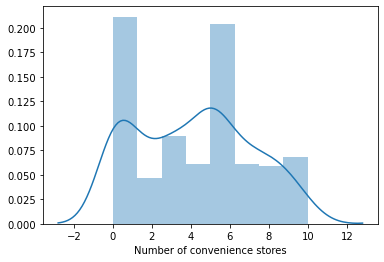

In [ ]:
#distribution plot for Number of convienent Stores
sns.distplot(df['Number of convenience stores'])

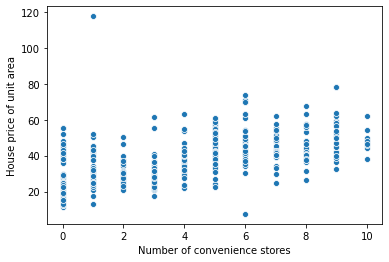

In [ ]:
#Scatterplot
sns.scatterplot(df['Number of convenience stores'],df['House price of unit area'])

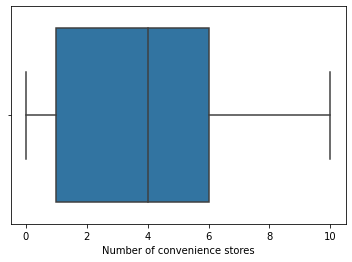

In [ ]:
#Boxplot
sns.boxplot(df['Number of convenience stores'])

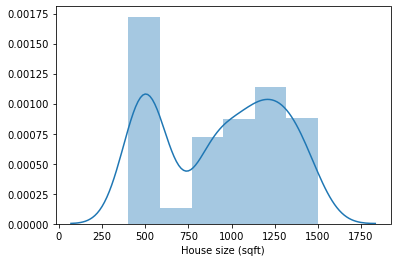

In [ ]:
#distribution plot for House_size
sns.distplot(df['House size (sqft)'])

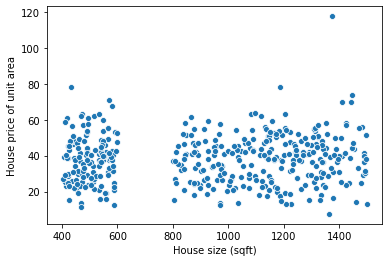

In [ ]:
#Scatterplot
sns.scatterplot(df['House size (sqft)'],df['House price of unit area'])

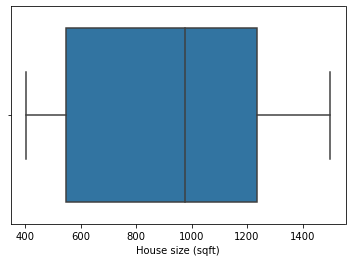

In [ ]:
#Boxplot
sns.boxplot(df['House size (sqft)'])

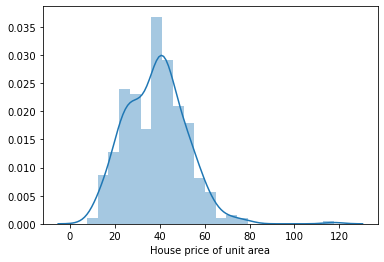

In [ ]:
#Distributionlplot for House price of unit area
sns.distplot(df['House price of unit area'])

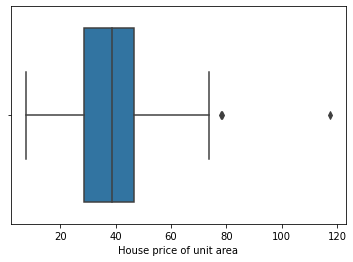

In [ ]:
#scatterplot
sns.boxplot(df['House price of unit area'])

###### Observation: Here in the above case we have detected some outliers 

In [ ]:
#Detecting and segregation of outliers

Q1 = np.percentile(df['House price of unit area'], 25,
                    interpolation='midpoint')

Q3 = np.percentile(df['House price of unit area'], 75,
                     interpolation='midpoint')

IQR = Q3 -Q1

Lower_out_frq = Q1 - (3*(IQR))
Upper_out_frq = Q3 + (3*(IQR))

In [ ]:
Lower_out_frq,Upper_out_frq

(-26.20000000000001, 101.20000000000002)

##### Note: Anything Below -26 and Greater than 100 is considered an outlier

In [ ]:
Outlier = np.where(df['House price of unit area']>100)
df.drop(Outlier[0],inplace=True)

In [ ]:
#Checking the shape of the changed dataframe
df.shape

(408, 6)

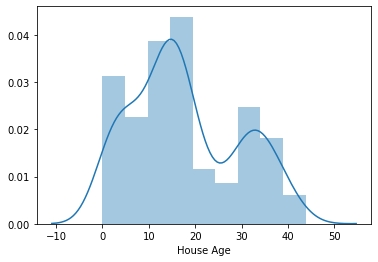

In [ ]:
#distrinution plot for House Age
sns.distplot(df['House Age'])

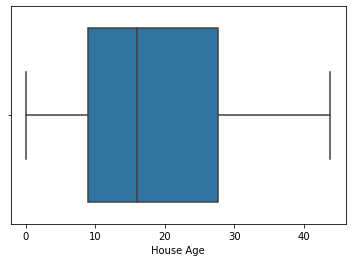

In [ ]:
#boxplot
sns.boxplot(df['House Age'])

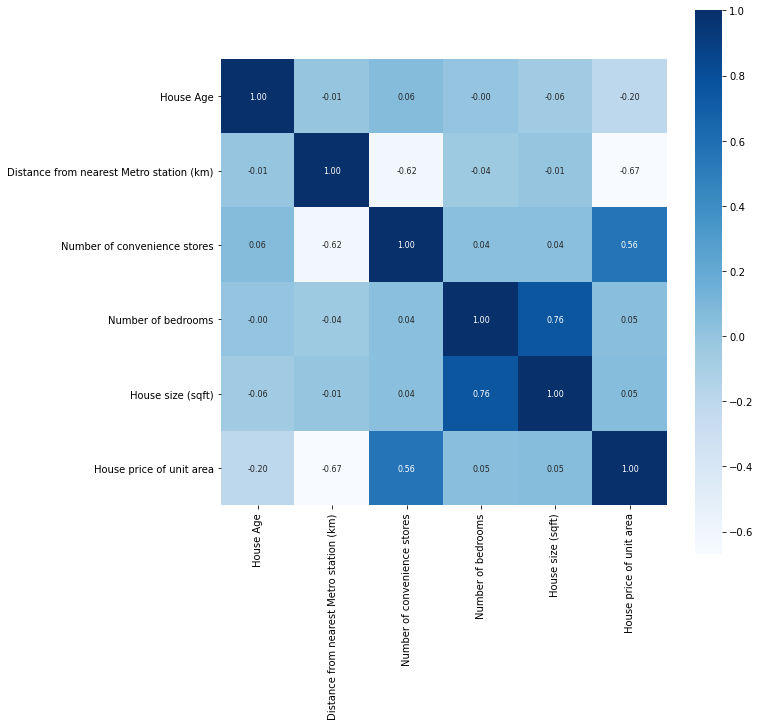

In [ ]:
# Correlation Metrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')


######  <b><i>Observation: From the following plot we could say  the dependent function i.e House price of unit area is positively correlated with Num of conviennce store,but negatively correlated with Age of the house and Distance from the metro

In [ ]:
#Top 5 row
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1


### Model Creation and Evaluation

In [ ]:
# Splitting the dependent and independent values
x = df.drop('House price of unit area',axis=1)
y = df['House price of unit area']

In [ ]:
# Reading the independent values
x.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,1,575
1,19.5,306.59470,9,2,1240
2,13.3,561.98450,5,3,1060
3,13.3,561.98450,5,2,875
4,5.0,390.56840,5,1,491


In [ ]:
# Reading the dependent value
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [ ]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

x_train.shape, x_test.shape

((326, 5), (82, 5))

## Feature Scaling - Standardization of the data to ones and zeros

In [ ]:
# importing StandarScaler

from sklearn.preprocessing import StandardScaler

In [ ]:
# Providing StandardScaler a object
scaling = StandardScaler()

In [ ]:
scaling.fit(x_train)

StandardScaler()

In [ ]:
# Transformation of x_train and x_test
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
# Top 5 rows of scaled data
x_train_scaled.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft)
0,1.989428,-0.761401,0.326498,-0.313318,0.449411,0.166063
1,0.230351,1.327724,-0.027118,-0.753907,-1.670337,1.121229
2,-1.208107,1.035263,-0.380733,-0.592695,-1.501041,-1.039402
3,-0.566866,-0.559055,0.326498,0.789844,0.605191,-1.361627
4,1.261534,-0.528221,1.387345,0.494429,0.369031,1.339882


In [ ]:
# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
lr_predict

print("R2 score",r2_score(lr_predict,y_test))
print("MAE",mean_absolute_error(lr_predict,y_test))


R2 score 0.6705862877768314
MAE 5.481467084713045


In [ ]:
#reading the predicted values
lr_predicted =pd.DataFrame(lr_predict)
lr_predicted.head()

,0
0,52.541733
1,49.083133
2,47.011456
3,33.766407
4,40.783024


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3)
ridge.fit(x_train,y_train)
y_pred1 = ridge.predict(x_test)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.6704675615780894
MAE 5.480956313107402


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=40,random_state=1)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.7074204501129129
MAE 5.853658536585366


###### Observation: we could say that The decision tree performed well ( R2 score increased) bcoz, linear regression perform well on only linear data, and in decision tree there is no linearity required

In [ ]:
df.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,-0.008158,0.059586,-0.001745,-0.058641,-0.201398
Distance from nearest Metro station (km),-0.008158,1.000000,-0.617519,-0.041689,-0.005005,-0.668741
Number of convenience stores,0.059586,-0.617519,1.000000,0.041202,0.036439,0.562988
Number of bedrooms,-0.001745,-0.041689,0.041202,1.000000,0.757203,0.047772
House size (sqft),-0.058641,-0.005005,0.036439,0.757203,1.000000,0.053183
House price of unit area,-0.201398,-0.668741,0.562988,0.047772,0.053183,1.000000


##### Here we create a function for the user to find the house on basis on the given data and get the estimated price of the house using descision tree algorithm which we saw earlier because it performed well on comparision with ridge and linear regression

In [ ]:
def predict():
        House_Age = float(input("House Age"))
    Distance_from_NearestMetro_Inkm = float(input("Distance from nearest Metro station (km)"))
    No_of_Convinence_Stores = float(input("Number of convenience stores"))
    No_of_Bedrooms = float(input("Number of Bedrooms"))
    House_size_sqft = float(input("House size (sqft)"))

    data = np.array([[House_Age, Distance_from_NearestMetro_Inkm, No_of_Convinence_Stores,No_of_Bedrooms,House_size_sqft]])
    
    output = dt.predict(data)
    
    print("Price for the unit area of the house is & accuracy : ", output )

In [ ]:
predict()

House Age34
Distance from nearest Metro station (km)250.4
Number of convenience stores8
Number of Bedrooms2
House size (sqft)1100
Price for the unit area of the house is & accuracy :  [40.2]


In [ ]:
#for the reference of client
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


### From this  we can find the price of the unit area of the house for the details for an user enters

